In [7]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.fft as fft

In [8]:
num_frames = 100
timestep = 0.05
t_vals = np.linspace(0.0, (num_frames-1)*timestep, num_frames)
# print(t_vals)
# s_vals = np.linspace(0.0, 2*np.pi, 101)
s_vals = np.linspace(0.1, 20.1, 101)
# s_vals = np.linspace(0, 100, 101)
# s_vals[0] = 1e-10
s_vals = s_vals[:-1]
print(s_vals)
r_vals = np.linspace(0.0, 10.0, 501)
r_vals = r_vals[:-1]

# # get the range of k values
# k_vals = fft.fftfreq(r_vals.shape[0], d=r_vals[1]-r_vals[0])
# k_vals = fft.fftshift(k_vals)
# # k_vals = 2 * np.pi * k_vals
# # print(k_vals)
# print(f"shape of k_vals : {k_vals.shape}")

[ 0.1  0.3  0.5  0.7  0.9  1.1  1.3  1.5  1.7  1.9  2.1  2.3  2.5  2.7
  2.9  3.1  3.3  3.5  3.7  3.9  4.1  4.3  4.5  4.7  4.9  5.1  5.3  5.5
  5.7  5.9  6.1  6.3  6.5  6.7  6.9  7.1  7.3  7.5  7.7  7.9  8.1  8.3
  8.5  8.7  8.9  9.1  9.3  9.5  9.7  9.9 10.1 10.3 10.5 10.7 10.9 11.1
 11.3 11.5 11.7 11.9 12.1 12.3 12.5 12.7 12.9 13.1 13.3 13.5 13.7 13.9
 14.1 14.3 14.5 14.7 14.9 15.1 15.3 15.5 15.7 15.9 16.1 16.3 16.5 16.7
 16.9 17.1 17.3 17.5 17.7 17.9 18.1 18.3 18.5 18.7 18.9 19.1 19.3 19.5
 19.7 19.9]


In [9]:
dk = 1/(r_vals[-1]-r_vals[0])
# we need only the positive k values
# k_vals = np.linspace(0.0, np.pi*dk, (r_vals.shape[0])//2)
k_vals = np.linspace(-np.pi*dk, np.pi*dk, (r_vals.shape[0]))
# k_vals = np.linspace(-np.pi/dk, np.pi/dk, r_vals.shape[0])
print(k_vals)
print(k_vals.shape)

[-0.31478884 -0.31352716 -0.31226549 -0.31100381 -0.30974213 -0.30848045
 -0.30721877 -0.30595709 -0.30469541 -0.30343373 -0.30217206 -0.30091038
 -0.2996487  -0.29838702 -0.29712534 -0.29586366 -0.29460198 -0.2933403
 -0.29207863 -0.29081695 -0.28955527 -0.28829359 -0.28703191 -0.28577023
 -0.28450855 -0.28324687 -0.2819852  -0.28072352 -0.27946184 -0.27820016
 -0.27693848 -0.2756768  -0.27441512 -0.27315344 -0.27189177 -0.27063009
 -0.26936841 -0.26810673 -0.26684505 -0.26558337 -0.26432169 -0.26306002
 -0.26179834 -0.26053666 -0.25927498 -0.2580133  -0.25675162 -0.25548994
 -0.25422826 -0.25296659 -0.25170491 -0.25044323 -0.24918155 -0.24791987
 -0.24665819 -0.24539651 -0.24413483 -0.24287316 -0.24161148 -0.2403498
 -0.23908812 -0.23782644 -0.23656476 -0.23530308 -0.2340414  -0.23277973
 -0.23151805 -0.23025637 -0.22899469 -0.22773301 -0.22647133 -0.22520965
 -0.22394797 -0.2226863  -0.22142462 -0.22016294 -0.21890126 -0.21763958
 -0.2163779  -0.21511622 -0.21385454 -0.21259287 -0.2

In [10]:
alpha0 = 0.5
d0 = 2.0

In [11]:
u_test = np.zeros((num_frames, k_vals.shape[0]))
for i in range(num_frames):
    for j in range(k_vals.shape[0]):
        u_test[i, j] = s_vals[i]**(alpha0-1) / (s_vals[i]**(alpha0) + d0*k_vals[j]**2)
# print(u_test)
# print(np.trapz(u_test, k_vals, axis=1).reshape(-1, 1)[0])
# u_test = u_test / np.trapz(u_test, k_vals, axis=1).reshape(-1, 1)

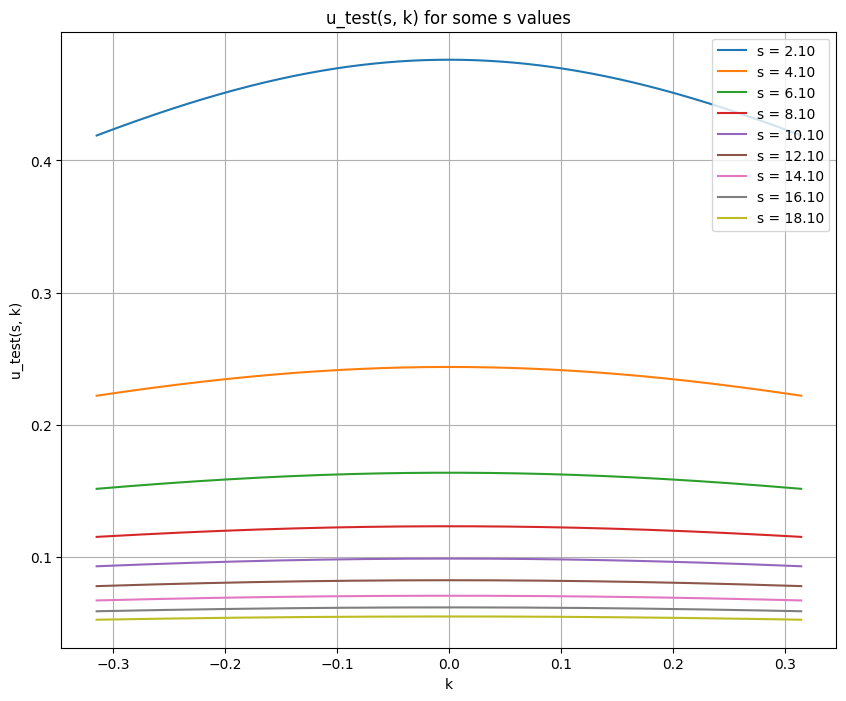

In [12]:
# plot u_test
# plot the u_pred(s, k) for some s values
plt.figure(figsize=(10, 8))
plt.title("u_test(s, k) for some s values")
plt.xlabel("k")
plt.ylabel("u_test(s, k)")
plt.grid()
for i in range(0, s_vals.shape[0], 10):
    if i == 0:
        continue
    plt.plot(k_vals, u_test[i, :], label=f"s = {s_vals[i]:.2f}")

plt.legend()
plt.show()

$u(s, k) = \frac{s^{\alpha-1}}{s^{\alpha-1}+Dk^2}$